In [1]:
# pip install numpy
# pip install matplotlib.pyplot

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE



from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[' '])
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
missing_total_charges = df[df['TotalCharges'].isna()]
result = missing_total_charges[['tenure', 'TotalCharges', 'MonthlyCharges','Churn']]
result

,tenure,TotalCharges,MonthlyCharges,Churn
488,0,NaN,52.55,No
753,0,NaN,20.25,No
936,0,NaN,80.85,No
1082,0,NaN,25.75,No
1340,0,NaN,56.05,No
3331,0,NaN,19.85,No
3826,0,NaN,25.35,No
4380,0,NaN,20.00,No
5218,0,NaN,19.70,No
6670,0,NaN,73.35,No


In [8]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_21788\3122530671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [8]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.isnull().sum()

C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\2498200106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['customerID'].duplicated().sum()

0

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
def replace(value):
    if value == 0:
        return "NO"
    else:
        return "Yes"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(replace)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_21788\1180803251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=custom_palette)


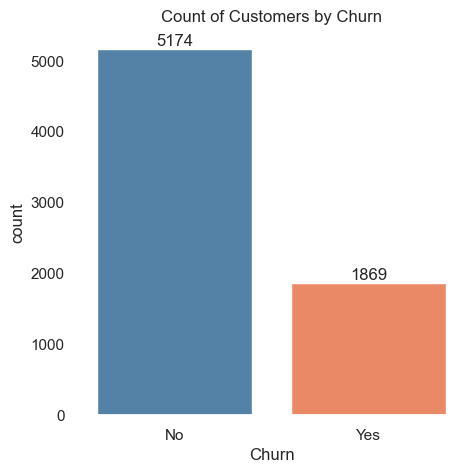

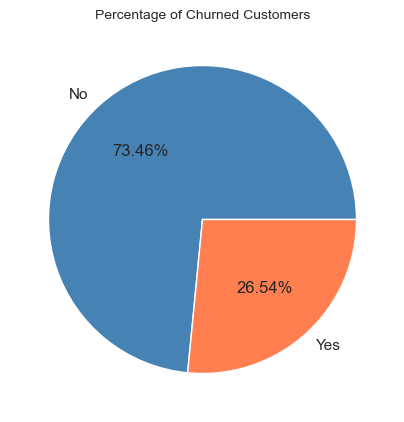

In [16]:
custom_palette = {'Yes': '#FF7F50', 'No': '#4682B4'}
plt.figure(figsize=(5,5))
plt.gca().set_facecolor('white')
ax = sns.countplot(x='Churn', data=df, palette=custom_palette)
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
ax.grid(False)
plt.title("Count of Customers by Churn")
plt.figure(figsize=(5,5))
gb = df.groupby("Churn").agg({'Churn': 'count'})
colors = ['#4682B4', '#FF7F50']
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%', colors=colors)
plt.title("Percentage of Churned Customers", fontsize=10)
plt.gca().set_facecolor('white')
plt.show()

C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\691032205.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


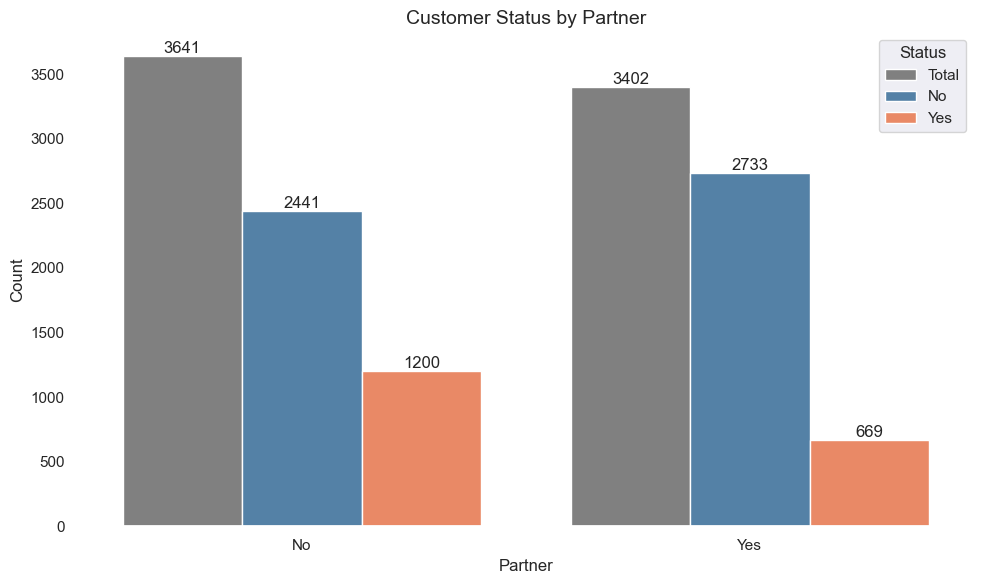

In [14]:
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
partner_churn = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
partner_churn['Total'] = partner_churn.sum(axis=1)
plot_data = partner_churn.reset_index().melt(id_vars='Partner', value_vars=['Total', 'No', 'Yes'], 
                                             var_name='Status', value_name='Count')
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('white')
plt.title('Customer Status by Partner', fontsize=14)
ax = sns.barplot(x='Partner', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('Partner')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(title='Status')
current_labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = ['' if label == 'Total' else label for label in current_labels]
ax.set_xticklabels(new_labels)
plt.xlim(-0.5, 1.5)
plt.tight_layout()
plt.grid(False)
plt.show()

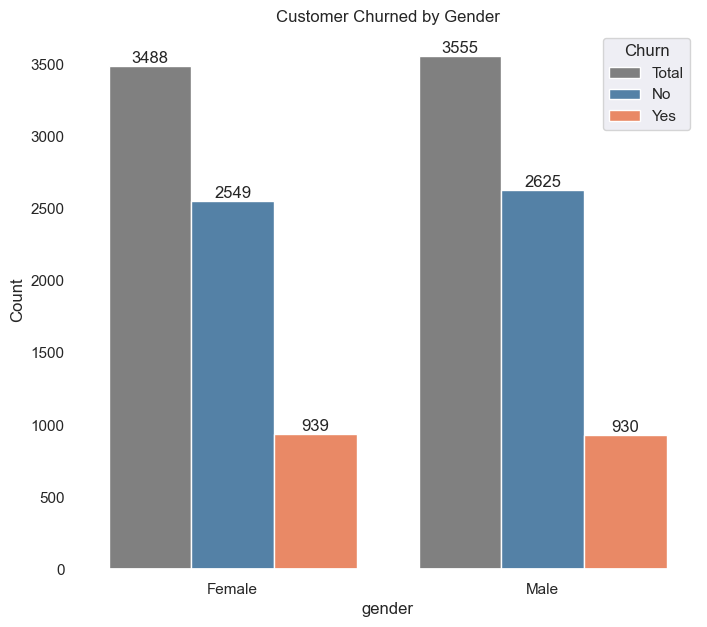

In [16]:
gender_churn = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
gender_churn['Total'] = gender_churn.sum(axis=1)
plot_data = gender_churn.reset_index().melt(id_vars='gender', value_vars=['Total', 'No', 'Yes'], 
                                            var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(8, 7))
plt.gca().set_facecolor('white')
plt.title('Customer Churned by Gender')
ax = sns.barplot(x='gender', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Churn')
plt.grid(False)
plt.show()

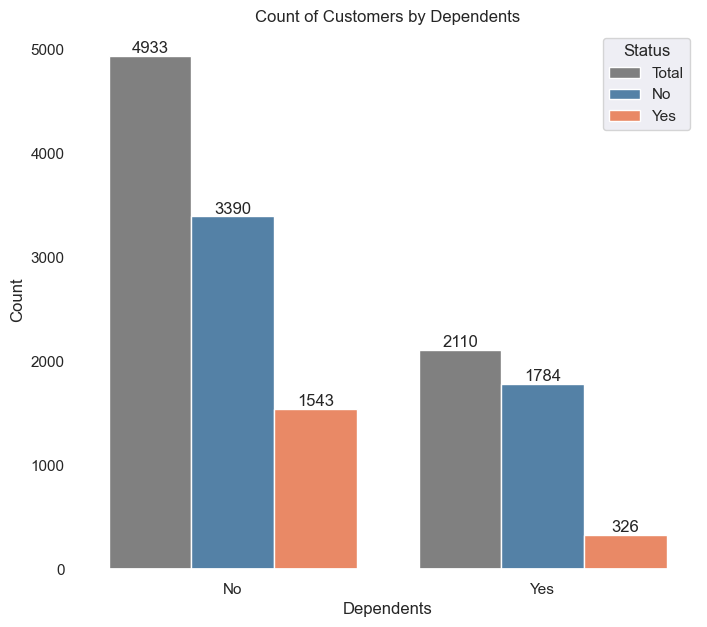

In [15]:
dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)
dependents_churn['Total'] = dependents_churn.sum(axis=1)

plot_data = dependents_churn.reset_index().melt(id_vars='Dependents', value_vars=['Total', 'No', 'Yes'], 
                                                var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(8, 7))
plt.gca().set_facecolor('white')
plt.title("Count of Customers by Dependents")
ax = sns.barplot(x='Dependents', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()

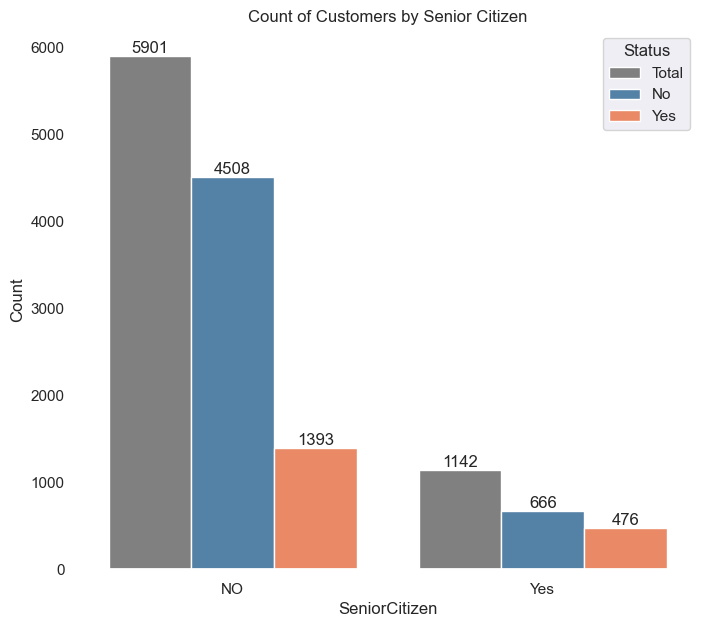

In [19]:
senior_citizen_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
senior_citizen_churn['Total'] = senior_citizen_churn.sum(axis=1)
plot_data = senior_citizen_churn.reset_index().melt(id_vars='SeniorCitizen', value_vars=['Total', 'No', 'Yes'], 
                                                    var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(8, 7))
plt.gca().set_facecolor('white')
plt.title("Count of Customers by Senior Citizen")
ax = sns.barplot(x='SeniorCitizen', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()

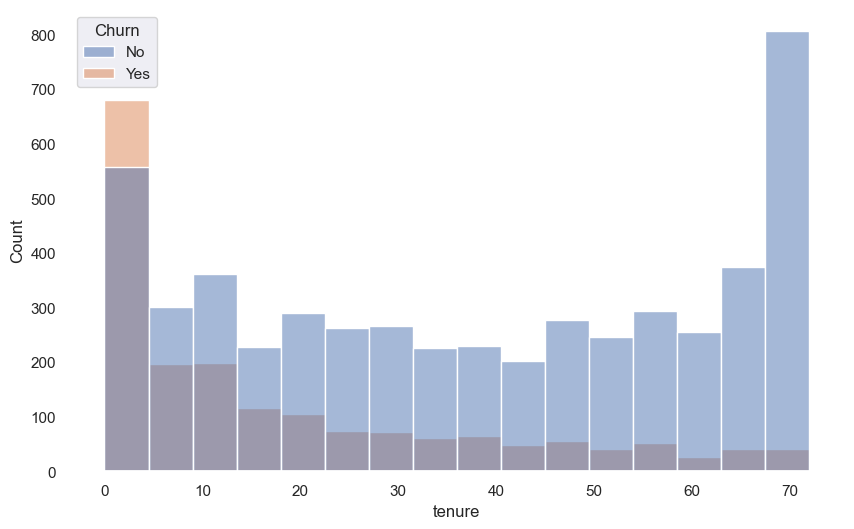

In [17]:
plt.figure(figsize = (10,6))
plt.gca().set_facecolor('white')
sns.histplot(x = 'tenure', data = df, hue= 'Churn')
plt.show()

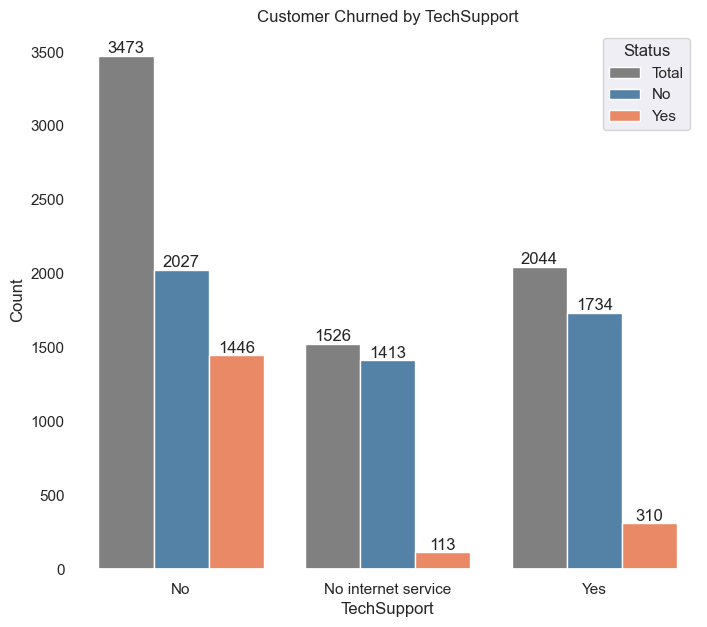

In [19]:
techsupport_churn = df.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0)
techsupport_churn['Total'] = techsupport_churn.sum(axis=1)
plot_data = techsupport_churn.reset_index().melt(id_vars='TechSupport', value_vars=['Total', 'No', 'Yes'], 
                                                 var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(8, 7))
plt.gca().set_facecolor('white')
plt.title("Customer Churned by TechSupport")
ax = sns.barplot(x='TechSupport', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()

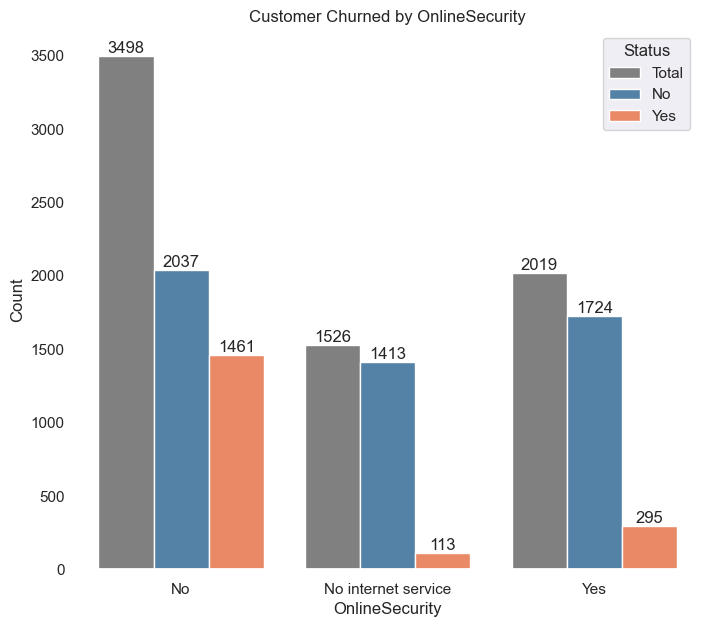

In [20]:
onlinesecurity_churn = df.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
onlinesecurity_churn['Total'] = onlinesecurity_churn.sum(axis=1)
plot_data = onlinesecurity_churn.reset_index().melt(id_vars='OnlineSecurity', value_vars=['Total', 'No', 'Yes'], 
                                                    var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(8, 7))
plt.gca().set_facecolor('white')
plt.title("Customer Churned by OnlineSecurity")
ax = sns.barplot(x='OnlineSecurity', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()

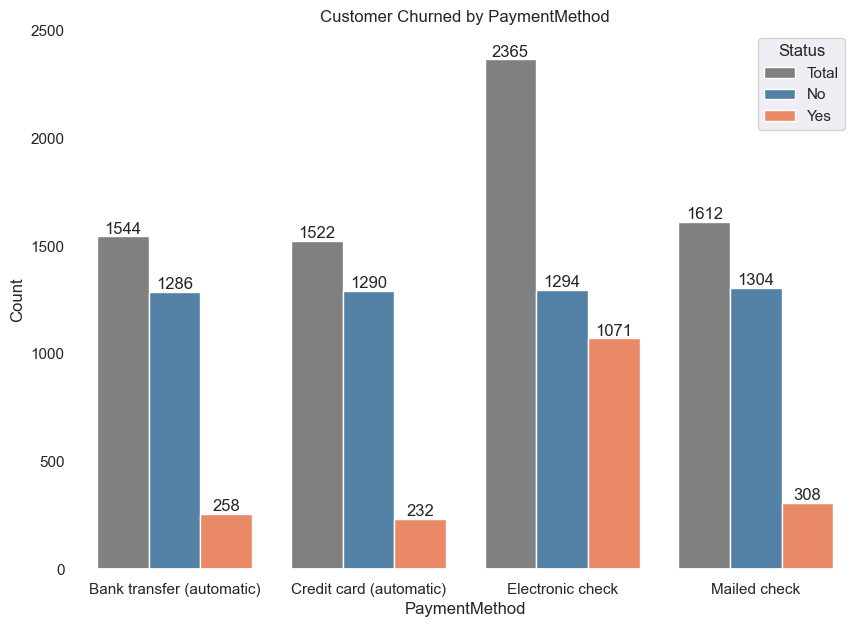

In [21]:
payment_method_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
payment_method_churn['Total'] = payment_method_churn.sum(axis=1)
plot_data = payment_method_churn.reset_index().melt(id_vars='PaymentMethod', value_vars=['Total', 'No', 'Yes'], 
                                                    var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(10, 7))
plt.gca().set_facecolor('white')
plt.title('Customer Churned by PaymentMethod')
ax = sns.barplot(x='PaymentMethod', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 2500)
ax.grid(False)
plt.legend(title='Status')
plt.show()

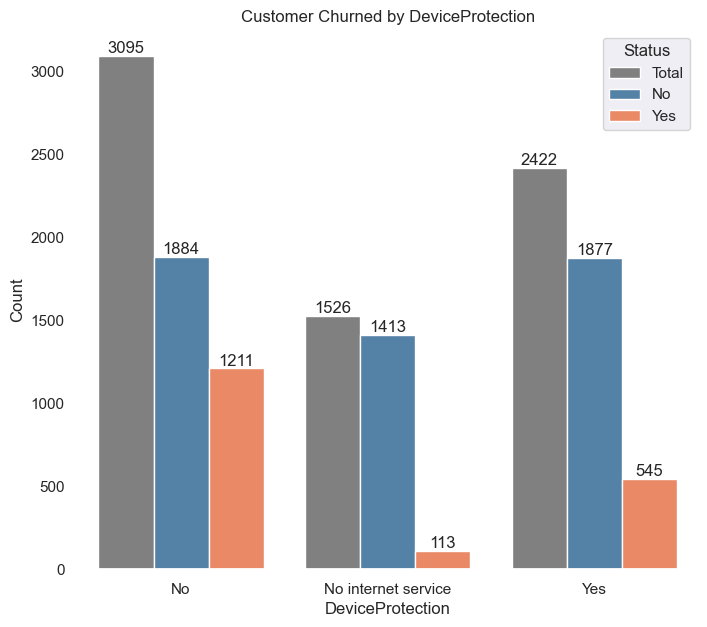

In [22]:
deviceprotection_churn = df.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)
deviceprotection_churn['Total'] = deviceprotection_churn.sum(axis=1)
plot_data = deviceprotection_churn.reset_index().melt(id_vars='DeviceProtection', value_vars=['Total', 'No', 'Yes'], 
                                                      var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(8, 7))
plt.gca().set_facecolor('white')
plt.title("Customer Churned by DeviceProtection")
ax = sns.barplot(x='DeviceProtection', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()

Index(['Contract', 'No', 'Yes', 'Total'], dtype='object', name='Churn')


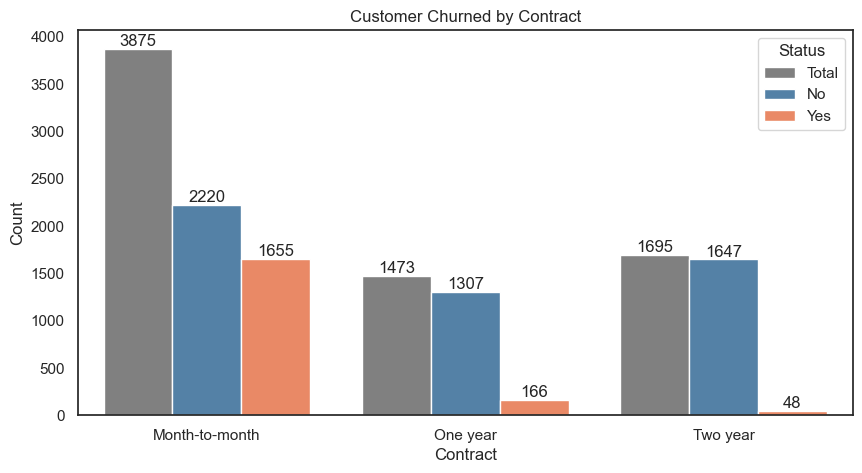

In [27]:
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract_churn['Total'] = contract_churn.sum(axis=1)
plot_data = contract_churn.reset_index()
print(plot_data.columns)

churn_status_cols = [col for col in plot_data.columns if col in ['Total', 'No', 'Yes']]
plot_data = plot_data.melt(id_vars='Contract', value_vars=churn_status_cols, 
                            var_name='Status', value_name='Count')

custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('white')
plt.title("Customer Churned by Contract")
ax = sns.barplot(x='Contract', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()


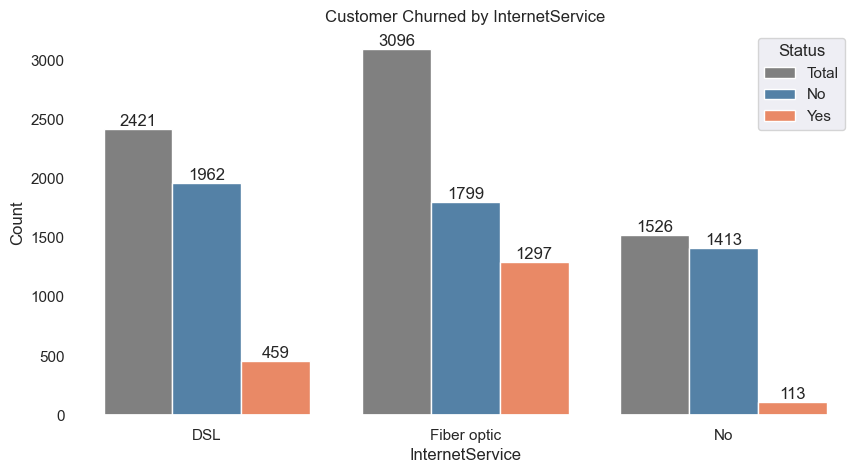

In [16]:
internetservice_churn = df.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
internetservice_churn['Total'] = internetservice_churn.sum(axis=1)
plot_data = internetservice_churn.reset_index().melt(id_vars='InternetService', value_vars=['Total', 'No', 'Yes'], 
                                                var_name='Status', value_name='Count')
custom_palette = {'Total': '#808080', 'No': '#4682B4', 'Yes': '#FF7F50'}
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('white')
plt.title("Customer Churned by InternetService")
ax = sns.barplot(x='InternetService', y='Count', hue='Status', data=plot_data, palette=custom_palette, 
                 hue_order=['Total', 'No', 'Yes'])
for container in ax.containers:
    ax.bar_label(container)
ax.grid(False)
plt.legend(title='Status')
plt.show()

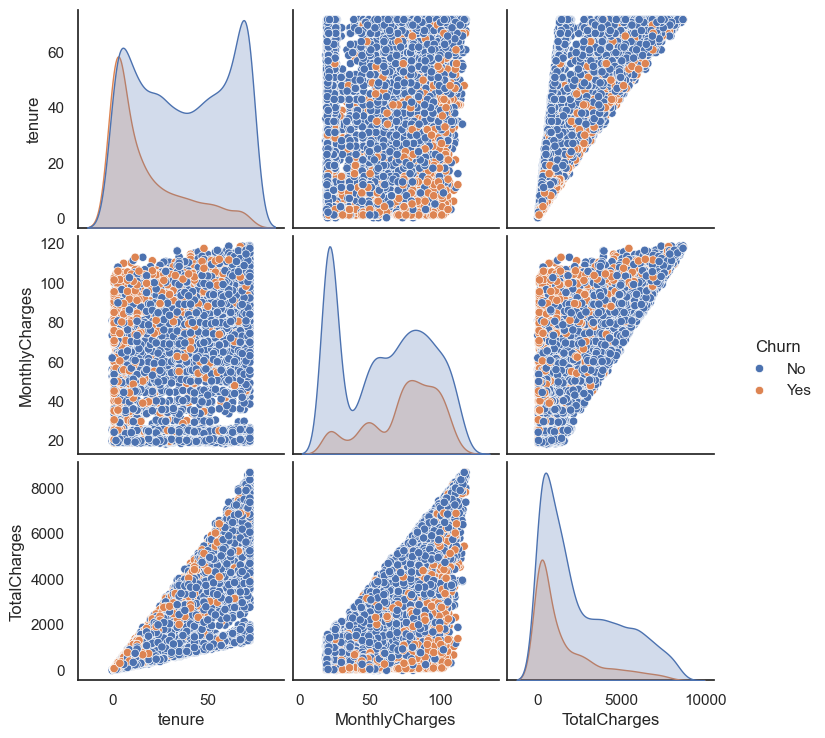

In [17]:
sns.set(style="white")

g = sns.pairplot(data=df, hue='Churn')

for ax in g.axes.flatten():
    ax.set_facecolor('white')
g.fig.set_facecolor('white')
plt.show()

In [26]:
 #chack garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('****'*10)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
****************************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
****************************************
SeniorCitizen
NO     5901
Yes    1142
Name: count, dtype: int64
****************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
****************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
****************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
****************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
****************************************
InternetService
Fiber optic    3096
DSL            2421
No    

C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\987735659.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], palette=color)
C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\987735659.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], palette=color)
C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\987735659.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], palette=color)


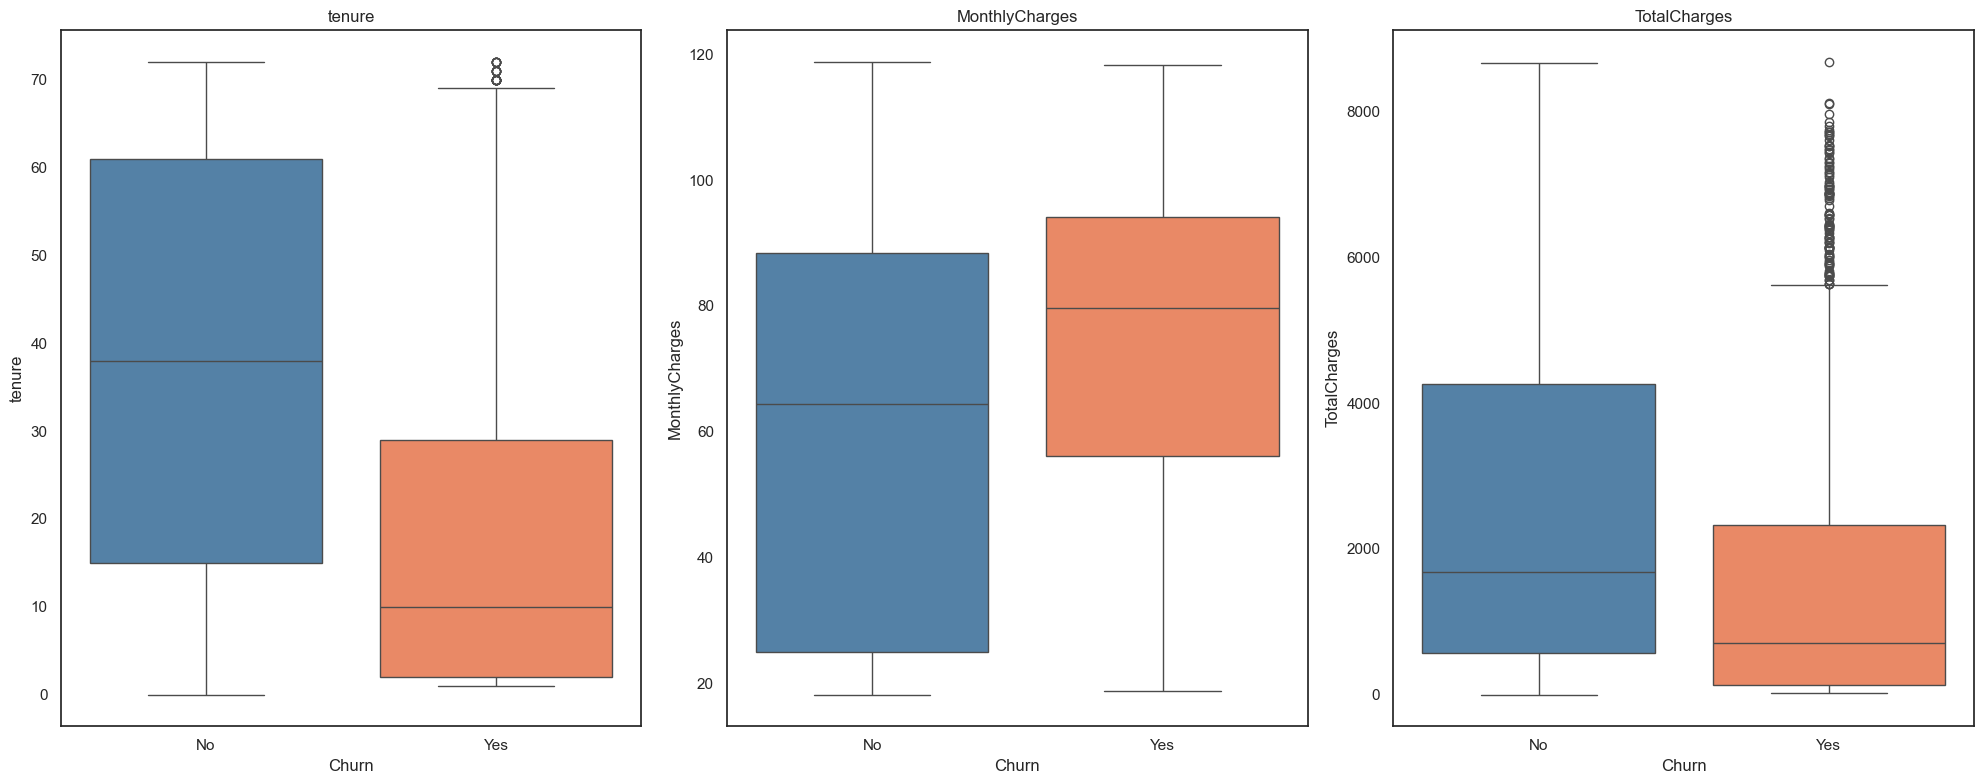

In [31]:
# Identify string fields
string_fields = [isinstance(fld, str) for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True]
continues_features = [x for x in all_features if x not in categorical_features]

# Define colors for the boxplots
color = ('#4682B4', '#FF7F50')

# Create subplots
num_plots = min(len(continues_features), 3)  # Ensure we don't exceed 3 plots
fig, ax = plt.subplots(1, num_plots, figsize=(20, 8))

# Create boxplots for continuous features
for i, p in enumerate(continues_features[:num_plots]):  # Limit to the number of subplots
    sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], palette=color)
    ax[i].set_title(p)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

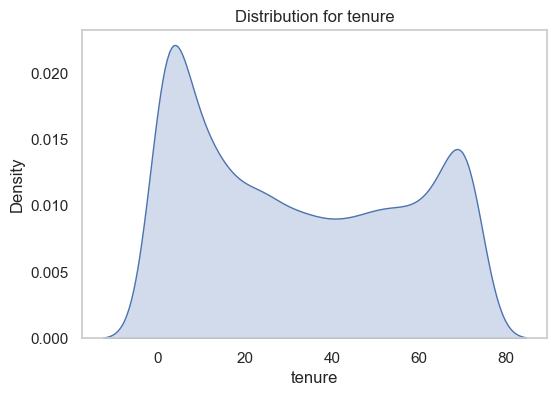

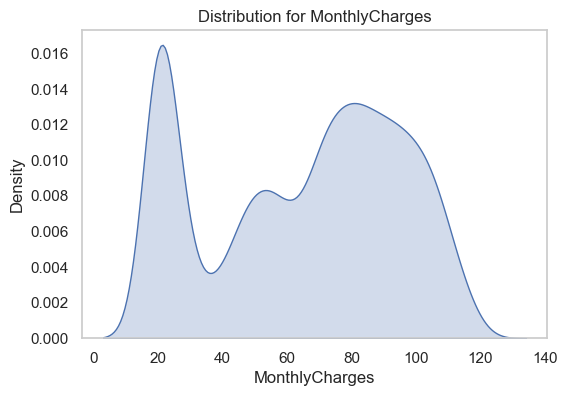

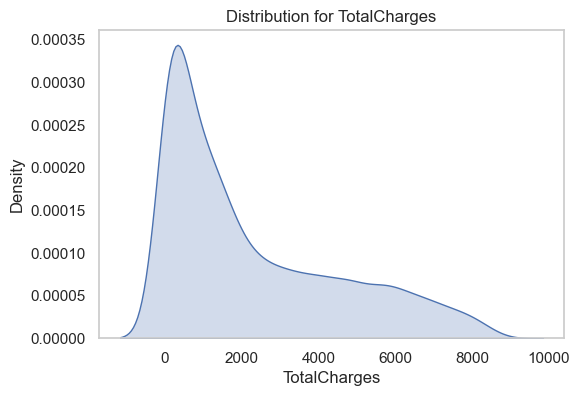

In [29]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=i, fill=True)
    plt.title(f"Distribution for {i}")
    plt.gca().set_facecolor('white')
    plt.grid(False)
    plt.show()

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({'Yes': 1, 'NO': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df.loc[df['InternetService'] == 'No', 'TechSupport'] = np.nan
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\770630375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\770630375.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SeniorCitizen'] = df['SeniorCitizen'].replace({'Yes': 1, 'NO': 0})
C:\Users\dhovsepyan\AppData\Local\Temp\ipykernel_7848\770630375.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

In [32]:
le = LabelEncoder()
df1=df.copy()
df2 = df.copy()
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,0.0,No,No,0,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,Yes,0.0,No,No,1,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,0.0,No,No,0,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,1.0,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,0.0,No,No,0,Yes,Electronic check,70.70,151.65,1


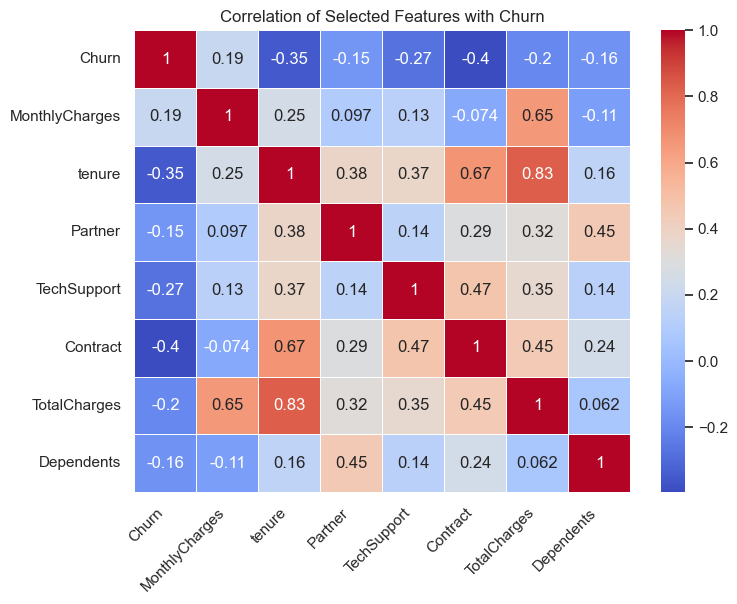

In [35]:
columns_of_interest = ['Churn', 'MonthlyCharges', 'tenure', 'Partner', 'TechSupport', 'Contract', 'TotalCharges','Dependents']
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Selected Features with Churn")
plt.xticks(rotation=45, ha='right')
plt.show()